In [8]:
import numpy as np
import scipy
from scipy import integrate,special,optimize

In [9]:
#ROSENBROCK equation

#  from 1 to n-1,    b(xi+1  - xi^2)^2 + (a-Xi)^2



#Nelder-mead techniques

 It does not use any gradient evaluations, it may take longer to find the minimum.

In [17]:
from scipy.optimize import minimize

def rosen(x):
    return sum(100.0 * (x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)

#since, summation runs from 1 to n-1 
#xi+1 is x[1:] all but not not first
#xi is all but not last one
#results indice values are used for calculation, a temp array



x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2])
res = minimize(rosen, x0, method='nelder-mead',options={'xatol': 1e-8, 'disp': True})


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 339
         Function evaluations: 571


In [18]:
print(res.x)

[1. 1. 1. 1. 1.]


In [21]:
def rosen_with_args(x, a, b):
    """The Rosenbrock function with additional arguments"""
    return sum(a*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0) + b

x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2])
res = minimize(rosen_with_args, x0, method='nelder-mead',args=(0.5,1.0),options={'xatol':1e-8 ,'disp':True})   #xatol is absolute tolearnce is x

Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 319
         Function evaluations: 525


In [22]:
print(res.x)

[1.         1.         1.         1.         0.99999999]


Broyden-Fletcher-Goldfarb-Shanno algorithm

this routine uses the gradient of the objective function. If the gradient is not given by the user, then it is estimated using first-differences

In [28]:
def gradient_rosen(x):
    xm = x[1:-1]  #all expect first and last
    xm_m1 = x[:-2]  #all expect last two , corresponds to x(j-1)
    xm_p1 = x[2:]   #all expect first two , corresponds to x(j+1)
    
    der = np.zeros_like(x)
    
    der[1:-1] = 200.0 * (xm - xm_m1**2.0) - 400.0 * xm *(xm_p1 - xm**2.0) - 2*(1-xm)
    der[0] = -400.0* x[0]*(x[1] - x[0]**2.0) -2*(1-x[0])  #derivative 0 separetely as it lacks elements left to it ie xj-1, ie xm_m1
    der[:-1] = 200.0 * (x[-1] - x[-2]**2.0)  #derivatives last separetely , lacks elements right to it.
    
    return der
x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2])
res = minimize(rosen, x0, method='BFGS', jac=gradient_rosen,options={'disp': True})


print(res.x)

         Current function value: 848.220000
         Iterations: 0
         Function evaluations: 63
         Gradient evaluations: 51
[1.3 0.7 0.8 1.9 1.2]


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\optimize\_minimize.py:708: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


In [29]:
np.diag([1,2,3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [30]:
np.diag([1,2,3,4])  #make elements on diagonal and returns 2d matrix

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

In [31]:
np.diag([[1, 2, 3], [4, 5, 6], [7, 8, 9]])   #returns diagonal if 2d matrix is given

array([1, 5, 9])

In [32]:
np.diag([[1, 2, 3], [4, 5, 6], [7, 8, 9]], k=1) #dignoal , offset 1, meaning another digonal right to it.

array([2, 6])

In [33]:
np.diag([[1, 2, 3], [4, 5, 6], [7, 8, 9]], k=2) #dignoal , offset 2 ,

array([3])

In [34]:
np.diag([[1, 2, 3], [4, 5, 6], [7, 8, 9]], k=-1) #dignoal , offset 1 , another digonla left to it.

array([4, 8])

In [35]:
np.diag([1,2,3,4,5,6],1)   #make diagonal with offset 1 to right (superdiagonal technically)

array([[0, 1, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 3, 0, 0, 0],
       [0, 0, 0, 0, 4, 0, 0],
       [0, 0, 0, 0, 0, 5, 0],
       [0, 0, 0, 0, 0, 0, 6],
       [0, 0, 0, 0, 0, 0, 0]])

In [36]:
np.diag([1,2,3,4,5,6],-1)   #make diagonal with offset 1 to left (subdiagonal techincally)

array([[0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0],
       [0, 0, 3, 0, 0, 0, 0],
       [0, 0, 0, 4, 0, 0, 0],
       [0, 0, 0, 0, 5, 0, 0],
       [0, 0, 0, 0, 0, 6, 0]])

So, when 2d array is fetched, it returns diagonal elemets applied offset if given 

And if elements is given , it makes 2d array applied if offset is given

#Netwon-Conjugate gradient algorithms 

In [39]:
def gradient_rosen(x):
    xm = x[1:-1]  #all expect first and last
    xm_m1 = x[:-2]  #all expect last two , corresponds to x(j-1)
    xm_p1 = x[2:]   #all expect first two , corresponds to x(j+1)
    
    der = np.zeros_like(x)
    
    der[1:-1] = 200.0 * (xm - xm_m1**2.0) - 400.0 * xm *(xm_p1 - xm**2.0) - 2*(1-xm)
    der[0] = -400.0* x[0]*(x[1] - x[0]**2.0) -2*(1-x[0])  #derivative 0 separetely as it lacks elements left to it ie xj-1, ie xm_m1
    der[:-1] = 200.0 * (x[-1] - x[-2]**2.0)  #derivatives last separetely , lacks elements right to it.
    
    return der


def rosen_hess(x):
    x = np.asarray(x)  
    H = np.diag(-400*x[:-1],1) - np.diag(400*x[:-1],-1)  #right offset1 diagnoal - left offset1 diagnoal  (1 elemets less than main diagonal)
    diagonal = np.zeros_like(x)
    diagonal[0] = 1200*x[0]**2-400*x[1]+2
    diagonal[-1] = 200
    diagonal[1:-1] = 202 + 1200*x[1:-1]**2 - 400*x[2:]
    H = H + np.diag(diagonal)
    return H


res = minimize(rosen, x0, method='Newton-CG',jac=gradient_rosen, hess=rosen_hess,
               options={'xtol': 1e-8, 'disp': True})   #xtol is x indepedent tolerance


print(res.x)


         Current function value: 848.220000
         Iterations: 0
         Function evaluations: 51
         Gradient evaluations: 40
         Hessian evaluations: 1
[1.3 0.7 0.8 1.9 1.2]


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\optimize\_optimize.py:2116: OptimizeWarning: Warning: Desired error not necessarily achieved due to precision loss.
  return terminate(2, msg)


In [41]:
def rosen_hess_p(x, p):
    x = np.asarray(x)
    Hp = np.zeros_like(x)
    Hp[0] = (1200*x[0]**2 - 400*x[1] + 2)*p[0] - 400*x[0]*p[1]
    Hp[1:-1] = -400*x[:-2]*p[:-2]+(202+1200*x[1:-1]**2-400*x[2:])*p[1:-1] \
               -400*x[1:-1]*p[2:]
    Hp[-1] = -400*x[-2]*p[-2] + 200*p[-1]
    return Hp


res = minimize(rosen, x0, method='Newton-CG',
               jac=gradient_rosen, hessp=rosen_hess_p,
               options={'xtol': 1e-8, 'disp': True})

print(res.x)

         Current function value: 848.220000
         Iterations: 0
         Function evaluations: 51
         Gradient evaluations: 40
         Hessian evaluations: 3
[1.3 0.7 0.8 1.9 1.2]


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\optimize\_optimize.py:2116: OptimizeWarning: Warning: Desired error not necessarily achieved due to precision loss.
  return terminate(2, msg)


Trust-Region Newton-Conjugate-Gradient Algorithm

In [43]:
res = minimize(rosen, x0, method='trust-ncg',
               jac=gradient_rosen, hess=rosen_hess,
               options={'gtol': 1e-8, 'disp': True})   #gtol is gradient tolerance

res.x

         Current function value: 848.220000
         Iterations: 27
         Function evaluations: 29
         Gradient evaluations: 1
         Hessian evaluations: 1


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\optimize\_minimize.py:732: RuntimeWarning: A bad approximation caused failure to predict improvement.
  res = _minimize_trust_ncg(fun, x0, args, jac, hess, hessp,


array([1.3, 0.7, 0.8, 1.9, 1.2])

In [44]:
res = minimize(rosen, x0, method='trust-ncg',
               jac=gradient_rosen, hessp=rosen_hess_p,
               options={'gtol': 1e-8, 'disp': True})

res.x

         Current function value: 848.220000
         Iterations: 27
         Function evaluations: 29
         Gradient evaluations: 1
         Hessian evaluations: 58


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\optimize\_minimize.py:732: RuntimeWarning: A bad approximation caused failure to predict improvement.
  res = _minimize_trust_ncg(fun, x0, args, jac, hess, hessp,


array([1.3, 0.7, 0.8, 1.9, 1.2])

Trust-Region Truncated Generalized Lanczos / Conjugate Gradient Algorithm (method='trust-krylov')

In [45]:
res = minimize(rosen, x0, method='trust-krylov',
               jac=gradient_rosen, hess=rosen_hess,
               options={'gtol': 1e-8, 'disp': True})
res.x

 iter inewton type    objective     âgââ_Mâ»Â¹      leftmost         Î»             Î³             Î´             Î±             Î²       
     0     0  cg_i -4.379340e+02  1.559961e+03  0.000000e+00  0.000000e+00  9.640000e+02  1.061000e+03  9.425071e-04  2.618627e+00

 TR Solving trust region problem, radius 1.000000e+00; starting on first irreducible block
 TR Coldstart. Seeking suitable initial Î»â, starting with 0
 TR Starting Newton iteration for Î»â with initial choice 0.000000e+00
 TR  iter        Î»            dÎ»       âhâ(Î»)â-radius
 TR      1  7.773885e+02  7.773885e+02  5.128718e-03
 TR      2  7.816906e+02  4.302153e+00  2.790987e-07
 TR      3  7.816909e+02  2.353445e-04  6.661338e-16
 TR Newton breakdown, dÎ» = 5.617044e-13 Î» = 7.816909e+02


 iter inewton type    objective     Î³áµ¢ââ|háµ¢|      leftmost         Î»             Î³             Î´             Î±             Î²       

     1     4  cg_b -8.293798e+02  3.410533e+02  0.000000e+00  7.8

c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\optimize\_minimize.py:735: RuntimeWarning: A bad approximation caused failure to predict improvement.
  res = _minimize_trust_krylov(fun, x0, args, jac, hess, hessp,


array([1.3, 0.7, 0.8, 1.9, 1.2])

In [46]:
res = minimize(rosen, x0, method='trust-krylov',
               jac=gradient_rosen, hessp=rosen_hess_p,
               options={'gtol': 1e-8, 'disp': True})

 iter inewton type    objective     âgââ_Mâ»Â¹      leftmost         Î»             Î³             Î´             Î±             Î²       
     0     0  cg_i -4.379340e+02  1.559961e+03  0.000000e+00  0.000000e+00  9.640000e+02  1.061000e+03  9.425071e-04  2.618627e+00

 TR Solving trust region problem, radius 1.000000e+00; starting on first irreducible block
 TR Coldstart. Seeking suitable initial Î»â, starting with 0
 TR Starting Newton iteration for Î»â with initial choice 0.000000e+00
 TR  iter        Î»            dÎ»       âhâ(Î»)â-radius
 TR      1  7.773885e+02  7.773885e+02  5.128718e-03
 TR      2  7.816906e+02  4.302153e+00  2.790987e-07
 TR      3  7.816909e+02  2.353445e-04  6.661338e-16
 TR Newton breakdown, dÎ» = 5.617044e-13 Î» = 7.816909e+02


 iter inewton type    objective     Î³áµ¢ââ|háµ¢|      leftmost         Î»             Î³             Î´             Î±             Î²       

     1     4  cg_b -8.293798e+02  3.410533e+02  0.000000e+00  7.8

c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\optimize\_minimize.py:735: RuntimeWarning: A bad approximation caused failure to predict improvement.
  res = _minimize_trust_krylov(fun, x0, args, jac, hess, hessp,


Constrained minimization of multivariate scalar functions (minimize)

Trust-Region Constrained Algorithm (method='trust-constr')

In [71]:
#bounds constrants

from scipy.optimize import Bounds

bounds = Bounds([1,1.5],[2,2.5])
#means first element x0 is bound from 1 to 2  and second element 1.5 to 2.5 , indices wise.

for i in range(len(bounds.lb)):
    print(f'Variable {i+1}: Lower bound = {bounds.lb[i]}, Upper bound = {bounds.ub[i]}')

Variable 1: Lower bound = 1.0, Upper bound = 2.0
Variable 2: Lower bound = 1.5, Upper bound = 2.5


In [60]:
#linear constrants

from scipy.optimize import LinearConstraint
import numpy as np

# Define the linear constraint
linear_constraint = LinearConstraint([[1, 2], [2, 1]], [-np.inf, 1], [5, 1])

# Print the constraints for each variable separately
for i, (coefficients, lower_bound, upper_bound) in enumerate(zip(linear_constraint.A, linear_constraint.lb, linear_constraint.ub)):
    print(f"Variable {i+1}: Coefficients = {coefficients}, Lower bound = {lower_bound}, Upper bound = {upper_bound}")


Variable 1: Coefficients = [1. 2.], Lower bound = -inf, Upper bound = 5.0
Variable 2: Coefficients = [2. 1.], Lower bound = 1.0, Upper bound = 1.0


In [64]:
#non-linear constrants

def con_f(x):   #objective function
    return [x[0]**2 +x[1] ,x[0]**2 -x[1]]

def jac_f(x):   #jacobian matrix
    return [[2*x[0] ,1] , [2*x[0] ,-1]]

def hes_f(x,v):  #hessian matrix
    return v[0] *np.array([[2,0],[0,0]])  + v[1] * np.array([[2,0],[0,0]])

from scipy.optimize import NonlinearConstraint


x = [1, 2]
v = [0.5, 0.5]

nonlinear_constraint = NonlinearConstraint(con_f, -np.inf, 1, jac_f, hes_f)

print("Value of con_f at x =", x, ":", nonlinear_constraint.fun(x))
print("Value of jac_f at x =", x, ":", nonlinear_constraint.jac(x))
print("Value of hes_f at x =", x, "and v =", v, ":", nonlinear_constraint.hess(x, v))


Value of con_f at x = [1, 2] : [3, -1]
Value of jac_f at x = [1, 2] : [[2, 1], [2, -1]]
Value of hes_f at x = [1, 2] and v = [0.5, 0.5] : [[2. 0.]
 [0. 0.]]


In [65]:
print("Constraint function:", nonlinear_constraint.fun.__name__)
print("Lower bound:", nonlinear_constraint.lb)
print("Upper bound:", nonlinear_constraint.ub)
print("Jacobian function:", nonlinear_constraint.jac.__name__)
print("Hessian function:", nonlinear_constraint.hess.__name__)

Constraint function: con_f
Lower bound: -inf
Upper bound: 1
Jacobian function: jac_f
Hessian function: hes_f


In [67]:
x0 = np.array([0.5, 0])
res = minimize(rosen, x0, method='trust-constr', jac=gradient_rosen, hessp=rosen_hess_p,
               constraints=[linear_constraint, nonlinear_constraint],
               options={'verbose': 1}, bounds=bounds)

`xtol` termination condition is satisfied.
Number of iterations: 156, function evaluations: 156, CG iterations: 144, optimality: 5.38e+00, constraint violation: 1.50e+00, execution time: 0.077 s.


Sequential Least SQuares Programming (SLSQP) Algorithm (method='SLSQP')

In [68]:
ineq_cons = {'type': 'ineq',
             'fun' : lambda x: np.array([1 - x[0] - 2*x[1],
                                         1 - x[0]**2 - x[1],
                                         1 - x[0]**2 + x[1]]),
             'jac' : lambda x: np.array([[-1.0, -2.0],
                                         [-2*x[0], -1.0],
                                         [-2*x[0], 1.0]])}
eq_cons = {'type': 'eq',
           'fun' : lambda x: np.array([2*x[0] + x[1] - 1]),
           'jac' : lambda x: np.array([2.0, 1.0])}

In [70]:
x0 = np.array([0.5, 0])
res = minimize(rosen, x0, method='SLSQP', jac=gradient_rosen,
               constraints=[eq_cons, ineq_cons], options={'ftol': 1e-9, 'disp': True},
               bounds=bounds)

Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: 25.0
            Iterations: 10
            Function evaluations: 41
            Gradient evaluations: 6


SHGO (Simplicial Homology Global Optimization)

Global Optimization ![alt text](figures/egg_holder_function.png)

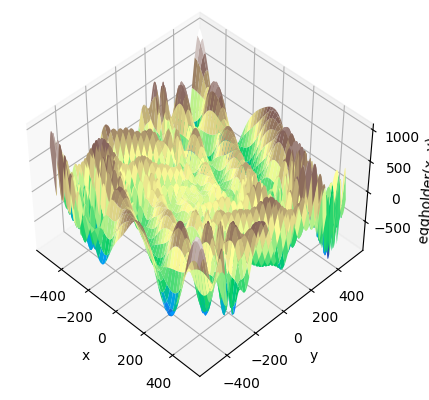

In [79]:
def eggholder(x):
    return (-(x[1] + 47) * np.sin(np.sqrt(abs(x[0]/2 + (x[1] + 47)))) -
            x[0] * np.sin(np.sqrt(abs(x[0] - (x[1] + 47)))))
    
    
bounds = [(-512,512) ,(-512,512)]


import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D


x = np.arange(-512,513)
y = np.arange(-512,513)
xgrid ,ygrid = np.meshgrid(x,y)

xy = np.stack([xgrid, ygrid])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(45,-45)
ax.plot_surface(xgrid,ygrid,eggholder(xy) ,cmap ='terrain')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('eggholder(x, y)')
plt.show()

In [80]:
results = dict()
results['shgo'] = optimize.shgo(eggholder, bounds)
results['shgo']

 message: Optimization terminated successfully.
 success: True
     fun: -935.3379515604948
    funl: [-9.353e+02]
       x: [ 4.395e+02  4.540e+02]
      xl: [[ 4.395e+02  4.540e+02]]
     nit: 1
    nfev: 47
   nlfev: 42
   nljev: 10
   nlhev: 0

In [81]:
results['DA'] = optimize.dual_annealing(eggholder, bounds)
results['DA']

 message: ['Maximum number of iteration reached']
 success: True
  status: 0
     fun: -956.9182316186543
       x: [ 4.824e+02  4.329e+02]
     nit: 1000
    nfev: 4175
    njev: 58
    nhev: 0

In [82]:
results['DE'] = optimize.differential_evolution(eggholder, bounds)
results['DE']

             message: Optimization terminated successfully.
             success: True
                 fun: -935.3379515605754
                   x: [ 4.395e+02  4.540e+02]
                 nit: 30
                nfev: 951
          population: [[ 4.398e+02  4.541e+02]
                       [ 4.417e+02  4.564e+02]
                       ...
                       [ 4.416e+02  4.543e+02]
                       [ 4.409e+02  4.562e+02]]
 population_energies: [-9.353e+02 -9.342e+02 ... -9.324e+02 -9.339e+02]
                 jac: [ 0.000e+00  0.000e+00]

In [83]:
results['shgo_sobol'] = optimize.shgo(eggholder, bounds, n=200, iters=5,
                                      sampling_method='sobol')
results['shgo_sobol']

 message: Optimization terminated successfully.
 success: True
     fun: -959.640662720846
    funl: [-9.596e+02 -9.353e+02 ... -6.591e+01 -6.387e+01]
       x: [ 5.120e+02  4.042e+02]
      xl: [[ 5.120e+02  4.042e+02]
           [ 4.395e+02  4.540e+02]
           ...
           [ 3.165e+01 -8.523e+01]
           [ 5.865e+01 -5.441e+01]]
     nit: 5
    nfev: 3541
   nlfev: 2339
   nljev: 630
   nlhev: 0